### Problem Definition
In this homework, I will use today's open, close, highest and lowest stock price to predict tomorrow's closing price.

Input: today's open, close, highest and lowest price from Apple, IBM, Amazon and Google

Output: tomorrow's closing price of corresponding input

Algorithm: multivariate linear regression model in Sklearn, user-defined gradient descent and tensorflow multivariate regression

Evaluation Model: Root Mean Square Error

### Model 1: Multivariate Linear Regression in Sklearn
#### Case 1: Apple

In [1]:
import pandas as pd

# load Apple stock price data, from: https://finance.yahoo.com/
data = pd.read_csv("AAPL.csv")

# add the closing price of next day as a new column
nextDayClosing = data["Close"].iloc[1:]

# delete last day wich has no closing price of next day
data = data.iloc[:-1,]

# add new column, named "NextDay", in the new pandas dataframe
data["NextDay"] = nextDayClosing.values

# randomize the dataset to eleminate time seriers effect
from sklearn.utils import shuffle
data = shuffle(data)

# another way to randomize dataset
# data.sample(frac=1)

In [2]:
# record input and output data set, X and y
X = data.iloc[:,1:5]
y = data.iloc[:,7:]

# transform to numpy matrix for efficient computation
import numpy as np
X = np.matrix(X)
y = np.matrix(y)

# another way to record y
# y= data["NextDay"].values
# y = np.matrix(y).T

# split into a 200 and 50 traning and testing dataset
X_train = X[:200]
y_train = y[:200,:]
X_test = X[200:]
y_test = y[200:]

# Verify the size of dataset
X_train.shape, y_train.shape

((200, 4), (200, 1))

In [3]:
from sklearn import linear_model

# create linear regression model
model = linear_model.LinearRegression()

# training model
model.fit(X_train, y_train)

# verifying and testing model 
y_pred = model.predict(X_test)
# use traning data as verifying data
verify = model.predict(X_train)

# calculate training and testing root mean square error
train_rmse = np.sqrt(sum(np.asarray(verify - y_train) ** 2) / len(y_train))
test_rmse = np.sqrt(sum(np.asarray(y_pred - y_test) ** 2) / len(y_pred))
print("Training RMSE: {0} and Testing RMSE: {1}".format(train_rmse, test_rmse))

Training RMSE: [ 1.42408951] and Testing RMSE: [ 1.65899197]


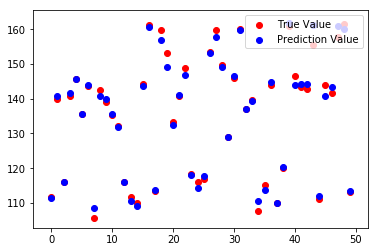

In [4]:
import matplotlib.pyplot as plt

# plot the True(red) and prediction(blue) value
plt.scatter(range(50), y_test, c = 'r', label='True Value')
plt.scatter(range(50), y_pred, c = 'blue', label='Prediction Value')
plt.legend(loc = 1)
plt.show()

### Model 2: Multivariate Linear Regression by User-defined Gradient Descent
#### Case 2: Amazon

In [5]:
import pandas as pd

# load Apple stock price data, from: https://finance.yahoo.com/
data = pd.read_csv("AMZN.csv")

# add the closing price of next day as a new column
nextDayClosing = data["Close"].iloc[1:]

# delete last day wich has no closing price of next day
data = data.iloc[:-1,]

# add new column, named "NextDay", in the new pandas dataframe
data["NextDay"] = nextDayClosing.values

# randomize the dataset to eleminate time seriers effect
from sklearn.utils import shuffle
data = shuffle(data)

# another way to randomize dataset
# data.sample(frac=1)

In [6]:
# record input and output data set, X and y are divided by 1000 to avoid overflowing problem
X = data.iloc[:,1:5] / 1000
#X = (X - X.mean()) / X.std()  
y = data.iloc[:,7:] / 1000
#y = (y - y.mean()) / y.std()  

# add constant parameter in the first column of dataframe X
X.insert(0, "Constant", 1)

# transform to numpy matrix for efficient computation
import numpy as np
X = np.matrix(X)
y = np.matrix(y)

# another way to record y
# y= data["NextDay"].values
# y = np.matrix(y).T

# split into a 200 and 50 traning and testing dataset
X_train = X[:200]
y_train = y[:200,:]
X_test = X[200:]
y_test = y[200:]

# Verify the size of dataset
X_train.shape, y_train.shape

((200, 5), (200, 1))

### Squared Error in Linear Model
#### Error Model
\begin{equation*}
Error = \frac{1}{2m} \sum_{i=1}^m (f(X_i) - y_i)^2 \\
= \frac{1}{2m} \sum_{i=1}^m (y_i-(mX_i+b))^2 
\end{equation*}

#### Partial Derivative
\begin{equation*}
\frac{\partial Error}{\partial m} = \frac{1}{m} \sum_{i=1}^m -X_i(y_i-(mX_i+b)) \\
\frac{\partial Error}{\partial b} = \frac{1}{m} \sum_{i=1}^m -(y_i-(mX_i+b))
\end{equation*}

In [7]:
# http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
# These code are implemented by other codes and I learned it

# Initialization
theta = np.matrix(np.array([0,0,0,0,0])) 
alpha = 0.1
iters = 20000

# Error measurement
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

# Gradient descent algorithm in multivariate regression
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

# training the model
train_theta, train_error = gradientDescent(X_train, y_train, theta, alpha, iters)
# testing the model
test_error = computeCost(X_test, y_test, train_theta)
print("Train error: {0} and Test error: {1}".format(train_error[-1], test_error))

Train error: 6.82947819672e-05 and Test error: 4.2974015993e-05


Train RMSE: [ 11.6871538] and Test RMSE: [ 9.27081614]


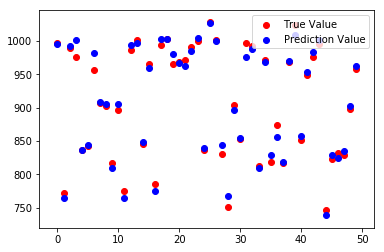

In [8]:
# recover data
y_pred = X_test * train_theta.T * 1000
y_test = y_test * 1000
verify = X_train * train_theta.T * 1000
y_train = y_train * 1000
train_rmse = np.sqrt(sum(np.asarray(verify - y_train) ** 2) / len(y_train))
test_rmse = np.sqrt(sum(np.asarray(y_pred - y_test) ** 2) / len(y_pred))
print("Train RMSE: {0} and Test RMSE: {1}".format(train_rmse, test_rmse))

import matplotlib.pyplot as plt

# plot the True(red) and prediction(blue) value
plt.scatter(range(50), y_test, c = 'r', label='True Value')
plt.scatter(range(50), y_pred, c = 'blue', label='Prediction Value')
plt.legend(loc = 1)
plt.show()

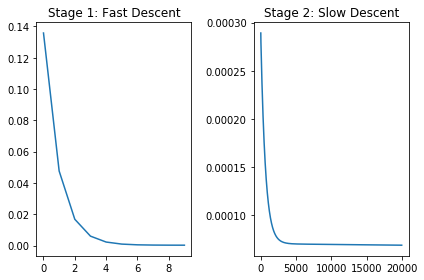

In [9]:
# Gradient descent error analysis, 1-10 fast, then slow down
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(train_error[:10])
plt.title("Stage 1: Fast Descent")
plt.subplot(122)
plt.plot(train_error[10:-1])
plt.title("Stage 2: Slow Descent")
plt.tight_layout()
plt.show()

### Model 3: Multivariate Linear Regression in Tensorflow
#### Case 3: Google

In [10]:
import pandas as pd

# load Apple stock price data, from: https://finance.yahoo.com/
data = pd.read_csv("GOOG.csv")

# add the closing price of next day as a new column
nextDayClosing = data["Close"].iloc[1:]

# delete last day wich has no closing price of next day
data = data.iloc[:-1,]

# add new column, named "NextDay", in the new pandas dataframe
data["NextDay"] = nextDayClosing.values

# randomize the dataset to eleminate time seriers effect
from sklearn.utils import shuffle
data = shuffle(data)

# another way to randomize dataset
# data.sample(frac=1)

In [11]:
# fetch the related data
x1_data = data["Open"].values / 1000
x2_data = data["High"].values / 1000
x3_data = data["Low"].values / 1000
x4_data = data["Close"].values / 1000
y_data = data["NextDay"].values / 1000

In [12]:
import numpy as np
import tensorflow as tf

# build a model
# input parameters
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
x4 = tf.placeholder(tf.float32)

# output parameters
y = tf.placeholder(tf.float32)

# weights and biase
w1 = tf.Variable(tf.random_normal([1]), name='w1')
w2 = tf.Variable(tf.random_normal([1]), name='w2')
w3 = tf.Variable(tf.random_normal([1]), name='w3')
w4 = tf.Variable(tf.random_normal([1]), name='w4')
b = tf.Variable(tf.random_normal([1]), name='b')

# hypothesis operations
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + x4 * w4 + b

# optimization process
cost = tf.sqrt(tf.reduce_mean(tf.square(hypothesis - y)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
train=optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(20001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                        feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, x4: x4_data, y: y_data})
    if (step == 20000):
        print("RMSE: ", cost_val * 1000)
        #test_rmse = np.sqrt(sum(np.asarray(y_data * 1000 - hy_val * 1000) ** 2) / len(y_data))

('RMSE: ', 19.702387973666191)


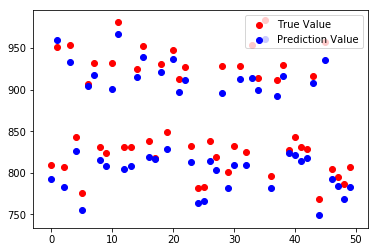

In [13]:
import matplotlib.pyplot as plt

# plot the True(red) and prediction(blue) value
plt.scatter(range((50)), y_data[:50] * 1000, c = 'r', label='True Value')
plt.scatter(range((50)), hy_val[:50] * 1000, c = 'blue', label='Prediction Value')
plt.legend(loc = 1)
plt.show()

### Model 4: Multivariate Linear Regression in Tensorflow
#### Case 4: IBM

In [14]:
import pandas as pd

# load Apple stock price data, from: https://finance.yahoo.com/
data = pd.read_csv("IBM.csv")

# add the closing price of next day as a new column
nextDayClosing = data["Close"].iloc[1:]

# delete last day wich has no closing price of next day
data = data.iloc[:-1,]

# add new column, named "NextDay", in the new pandas dataframe
data["NextDay"] = nextDayClosing.values

# randomize the dataset to eleminate time seriers effect
from sklearn.utils import shuffle
data = shuffle(data)

# another way to randomize dataset
# data.sample(frac=1)

In [15]:
# record input and output data set, X and y are divided by 1000 to avoid overflowing problem
X_data = data.iloc[:,1:5] / 1000
y_data = data.iloc[:,7:] / 1000

# transform to numpy matrix for efficient computation
import numpy as np
X_data = np.matrix(X_data)
y_data = np.matrix(y_data)

In [16]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4,1]), name='w')
b = tf.Variable(tf.random_normal([1], name='b'))

hypothesis = tf.matmul(X, W) + b

cost = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y, hypothesis))))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
train=optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: X_data, y: y_data})
    if (step == 20000):
        print(step, "RMSE: ", cost_val * 1000)

(20000, 'RMSE: ', 5.5092037655413151)


5.50920398318


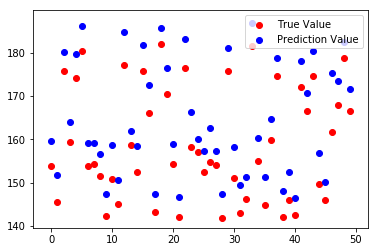

In [17]:
rmse = np.sqrt(np.sum(np.square(y_data * 1000 - hy_val * 1000)) / len(y_data))
print rmse

import matplotlib.pyplot as plt

# plot the True(red) and prediction(blue) value
plt.scatter(range(50), y_data[:50] * 1000, c = 'r', label='True Value')
plt.scatter(range(50), hy_val[:50] * 1000, c = 'blue', label='Prediction Value')
plt.legend(loc = 1)
plt.show()